# WeatherPy
----
### Trends:
#### 1. The first pair of scatter plots confirm that as you move towards the equator max temperature increases while as you move towards the poles the max temperature decreases.
#### 2. The second pair of scatter plots shows a positive correlation between latitude and humidity for both northern and southern hemispheres.
#### 3. The third pair of scatter plots shows a positive correlation between latitude and cloudiness for both northern and southern hemispheres.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key
temp_units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Set URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# City and Set Number
city_num = 0
set_num = 1
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if city_num > 48:
            city_num = 1
            set_num += 1
            city_two.append(city)
        else:
            city_num += 1
            city_two.append(city)
        print(f"Processing City Number {city_num} of set number {set_num}| {city}")
    except:
        print('no city found for this one')
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing City Number 1 of set number 1| ushuaia
Processing City Number 2 of set number 1| punta arenas
Processing City Number 3 of set number 1| yumen
Processing City Number 4 of set number 1| rikitea
Processing City Number 5 of set number 1| kawana waters
Processing City Number 6 of set number 1| mackay
Processing City Number 7 of set number 1| fairbanks
Processing City Number 8 of set number 1| tres arroyos
Processing City Number 9 of set number 1| albany
Processing City Number 10 of set number 1| clyde river
Processing City Number 11 of set number 1| grand forks
Processing City Number 12 of set number 1| boyolangu
Processing City Number 13 of set number 1| aksarka
Processing City Number 14 of set number 1| tasiilaq
Processing City Number 15 of set number 1| romny
Processing City Number 16 of set number 1| busselton
no city found for this one
Processing City Number 17 of set number 1| atuona
Processing City Number 18 of set number 1| kruisfontein
Processing City Number 19 of set nu

Processing City Number 4 of set number 4| lasa
Processing City Number 5 of set number 4| yarim
Processing City Number 6 of set number 4| jamestown
Processing City Number 7 of set number 4| ostrovnoy
Processing City Number 8 of set number 4| katsuura
Processing City Number 9 of set number 4| bandundu
Processing City Number 10 of set number 4| makakilo city
Processing City Number 11 of set number 4| kununurra
Processing City Number 12 of set number 4| tenenkou
no city found for this one
Processing City Number 13 of set number 4| rio grande
Processing City Number 14 of set number 4| prince rupert
Processing City Number 15 of set number 4| cocobeach
Processing City Number 16 of set number 4| barrow
Processing City Number 17 of set number 4| kargasok
Processing City Number 18 of set number 4| ribeira grande
Processing City Number 19 of set number 4| khasan
Processing City Number 20 of set number 4| xichang
Processing City Number 21 of set number 4| jamame
Processing City Number 22 of set nu

Processing City Number 5 of set number 7| north battleford
Processing City Number 6 of set number 7| saldanha
Processing City Number 7 of set number 7| saint-joseph
Processing City Number 8 of set number 7| vrangel
Processing City Number 9 of set number 7| kjollefjord
Processing City Number 10 of set number 7| louga
Processing City Number 11 of set number 7| zafra
Processing City Number 12 of set number 7| laguna
Processing City Number 13 of set number 7| hervey bay
Processing City Number 14 of set number 7| padang
Processing City Number 15 of set number 7| noumea
Processing City Number 16 of set number 7| kaduqli
Processing City Number 17 of set number 7| san cristobal
Processing City Number 18 of set number 7| chifeng
Processing City Number 19 of set number 7| terney
Processing City Number 20 of set number 7| maxixe
Processing City Number 21 of set number 7| urcos
Processing City Number 22 of set number 7| benghazi
Processing City Number 23 of set number 7| payo
Processing City Numbe

Processing City Number 10 of set number 10| remanso
Processing City Number 11 of set number 10| kysyl-syr
Processing City Number 12 of set number 10| nishihara
Processing City Number 13 of set number 10| taltal
no city found for this one
Processing City Number 14 of set number 10| kurya
Processing City Number 15 of set number 10| terrak
Processing City Number 16 of set number 10| puerto leguizamo
Processing City Number 17 of set number 10| sinnamary
Processing City Number 18 of set number 10| cuamba
Processing City Number 19 of set number 10| zyryanka
Processing City Number 20 of set number 10| kenora
Processing City Number 21 of set number 10| vestmanna
no city found for this one
Processing City Number 22 of set number 10| port blair
Processing City Number 23 of set number 10| richards bay
Processing City Number 24 of set number 10| lata
Processing City Number 25 of set number 10| mbalmayo
no city found for this one
Processing City Number 26 of set number 10| solnechnyy
Processing Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "city":city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

city      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        ushuaia -54.8000  -68.3000     53.60        54          75   
1   punta arenas   8.9897  125.3400     74.08        83          92   
2          yumen  40.2833   97.2000     25.27        69          15   
3        rikitea -23.1203 -134.9692     78.22        70           6   
4  kawana waters -23.3335  150.5051     75.20        83          40   

   Wind Speed Country        Date  
0       12.66      AR  1612388347  
1        4.34      PH  1612388509  
2       18.03      CN  1612388510  
3       12.48      PF  1612388226  
4        9.22      AU  1612388510

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
hum_one_hund = weather_df[weather_df['Humidity'].astype('int64') >= 100]
hum_one_hund

city      Lat       Lng  Max Temp  Humidity  Cloudiness  \
7      tres arroyos  46.3231   11.0969     35.60       100          90   
18        ventspils  57.3894   21.5606     24.80       100          40   
49           torbay  47.6666  -52.7314     44.01       100          75   
76        ketchikan  55.3422 -131.6461     37.40       100          90   
79        kabanjahe   3.1001   98.4908     77.00       100          40   
93        alyangula -13.8483  136.4192     78.80       100          99   
157       kununurra -15.7667  128.7333     80.60       100          96   
193             soe  -9.8607  124.2840     66.45       100         100   
221        meridian  43.6121 -116.3915     39.00       100          40   
224          kupang -10.1667  123.5833     77.00       100          75   
233    ishcherskaya  43.7153   45.1264     33.80       100          90   
292      ngorongoro  -3.2397   35.4875     51.89       100          61   
343         pachino  36.7186   15.0907     50.00       100          75   
426           airai  -8.9266  125.4092     61.43       100         100   
485  cap-aux-meules  47.3821  -61.8597     41.00       100         100   
486         aljezur  37.3191   -8.8033     55.99       100         100   
494    novopokrovka  49.8425   36.5477     39.20       100          90   
551            asau  46.4333   26.4000     37.40       100          90   

     Wind Speed Country        Date  
7         18.41      IT  1612388510  
18         2.30      LV  1612388512  
49        27.63      CA  1612388517  
76         5.75      US  1612388303  
79         3.44      ID  1612388526  
93         1.14      AU  1612388071  
157        4.18      AU  1612388542  
193        5.32      ID  1612388547  
221        4.61      US  1612388552  
224        2.30      ID  1612388552  
233        2.24      RU  1612388554  
292        2.64      TZ  1612388561  
343        1.14      IT  1612388567  
426        4.99      TL  1612388577  
485        9.22      CA  1612388585  
486        3.00      PT  1612388585  
494        8.95      UA  1612388586  
551       10.36      RO  1612388593

In [6]:
#  Get the indices of cities that have humidity over 100%.
hund_hum_indexes = [hum_one_hund[hum_one_hund['Humidity']==100].index.values]
hund_hum_indexes

[array([  7,  18,  49,  76,  79,  93, 157, 193, 221, 224, 233, 292, 343,
        426, 485, 486, 494, 551], dtype=int64)]

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_df = weather_df[weather_df['Humidity'].astype('int64') != 100]
cleaned_df.head()
cleaned_df.to_csv("output_data/cleaned_weather_data.csv", index=False, header=True)
#len(cleaned_df.index)

In [8]:
def plot_scat(y,y_label):
    lat_y = plt.scatter(cleaned_df['Lat'],cleaned_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(cleaned_df[y])-20,max(cleaned_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

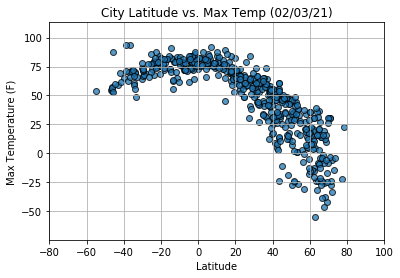

In [22]:
lat_temp = plot_scat(y='Max Temp',y_label='Max Temperature (F)')
lat_temp

### This scatter plot shows how max temperature (F) changes as latitude increases. 

## Latitude vs. Humidity Plot

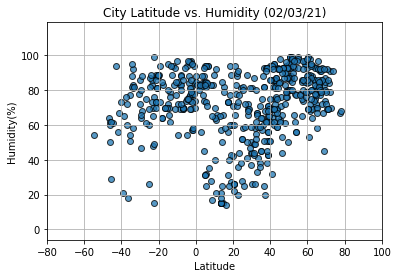

In [23]:
lat_humidity = plot_scat(y='Humidity',y_label='Humidity(%)')
lat_humidity

### This scatter plot shows how humidity (%) changes as latitude increases. 

## Latitude vs. Cloudiness Plot

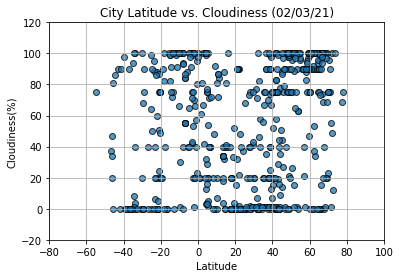

In [24]:
lat_cloud = plot_scat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

### This scatter plot shows how cloudiness (%) changes as latitude increases. 

## Latitude vs. Wind Speed Plot

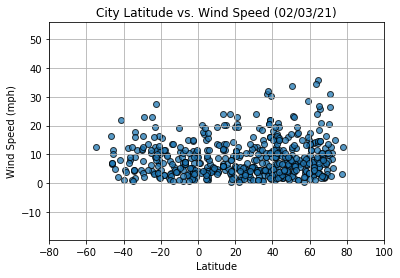

In [25]:
lat_wind = plot_scat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind

### This scatter plot shows how wind speed (mph) changes as latitude increases. 

## Linear Regression

In [13]:
north_hem = cleaned_df[cleaned_df['Lat'] >= 0]
south_hem = cleaned_df[cleaned_df['Lat'] < 0]

def plot_scat_north(y,y_label):
    lat_y = plt.scatter(north_hem['Lat'],north_hem[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(north_hem[y])-20,max(north_hem[y])+20)
    plt.grid()
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(north_hem['Lat'], north_hem[y])
    vc_fit = vc_slope * north_hem['Lat'] + vc_int
    plt.plot(north_hem['Lat'],vc_fit,'r',label='y={:.2f}x+{:.2f}'.format(vc_slope,vc_int))
    plt.legend(fontsize=9)
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))
    
def plot_scat_south(y,y_label):
    lat_y = plt.scatter(south_hem['Lat'],south_hem[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(south_hem[y])-20,max(south_hem[y])+20)
    plt.grid()
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(south_hem['Lat'], south_hem[y])
    vc_fit = vc_slope * south_hem['Lat'] + vc_int
    plt.plot(south_hem['Lat'],vc_fit,'r',label='y={:.2f}x+{:.2f}'.format(vc_slope,vc_int))
    plt.legend(fontsize=9)
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

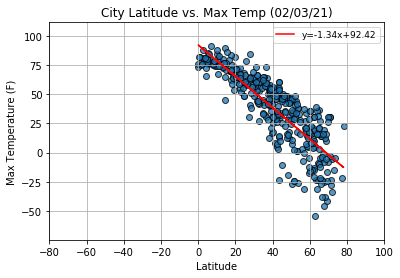

In [14]:
lat_temp_north = plot_scat_north(y='Max Temp',y_label='Max Temperature (F)')
lat_temp_north

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

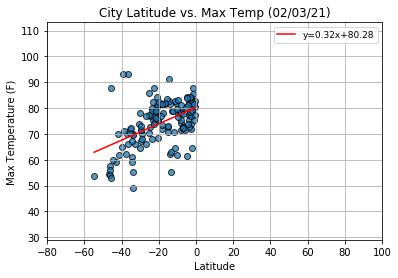

In [15]:
lat_temp_south = plot_scat_south(y='Max Temp',y_label='Max Temperature (F)')
lat_temp_south

### From this pair of scatter plots we can see that as you approach 0 latitude from the southern hemisphere, max temperature appears to increase. Also, as you approach 80 latitude continuing northward the max temperature starts to fall. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

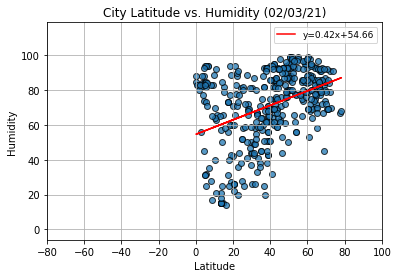

In [16]:
lat_hum_north = plot_scat_north(y='Humidity',y_label='Humidity')
lat_hum_north

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

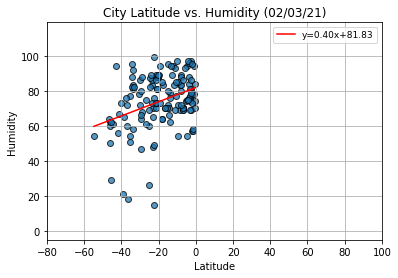

In [17]:
lat_hum_south = plot_scat_south(y='Humidity',y_label='Humidity')
lat_hum_south

### This pair of scatter plots shows that humidity increases as you approach the northern hemisphere from the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

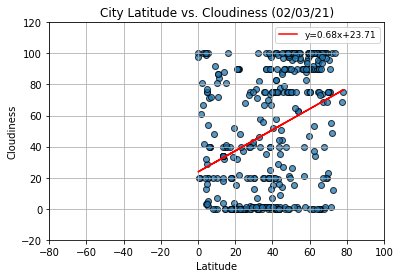

In [18]:
lat_cloud_north = plot_scat_north(y='Cloudiness',y_label='Cloudiness')
lat_cloud_north

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

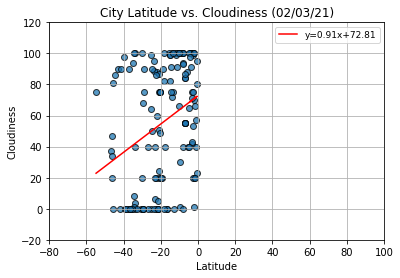

In [19]:
lat_cloud_south = plot_scat_south(y='Cloudiness',y_label='Cloudiness')
lat_cloud_south

### This pair of scatter plots shows that one can expect the cloudiness to increase similarly as one moves north from either the southern hemisphere or the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

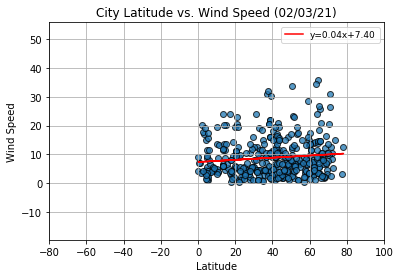

In [20]:
lat_cloud_north = plot_scat_north(y='Wind Speed',y_label='Wind Speed')
lat_cloud_north

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

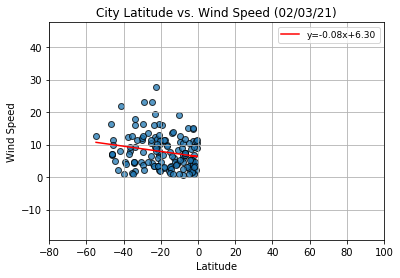

In [21]:
lat_cloud_south = plot_scat_south(y='Wind Speed',y_label='Wind Speed')
lat_cloud_south

### This pair of scatter plots shows no significant correlation between latitude and wind speed for neither the northern hemisphere nor the southern hemisphere. 